In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from json import load

In [39]:
results = load(open('bandbyband_results.json', 'r'))

In [40]:
len(results)

21

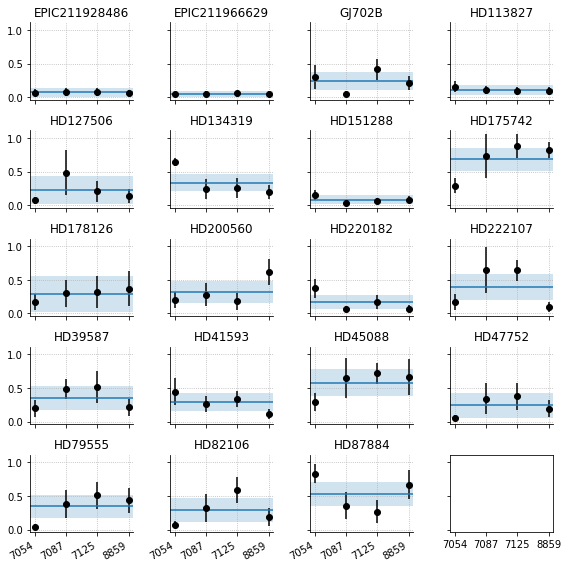

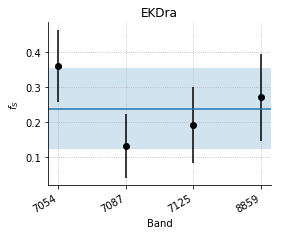

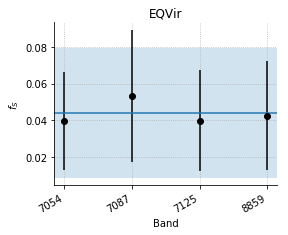

In [41]:
fig, ax = plt.subplots(5, 4, figsize=(8, 8), sharex=True, sharey=True)

table_results = []

stars_big_plot = sorted(results.keys())
stars_big_plot.remove('EKDra')
stars_big_plot.remove('EQVir')

for star in ['EKDra', 'EQVir']:
    figure, axis = plt.subplots(figsize=(4, 3))
    for time in results[star]:
        f_S = np.mean([results[star][time][band]['f_S'] for band in results[star][time]])
        f_S_err = np.sqrt(np.sum(np.array([np.mean([results[star][time][band]['f_S_lower'], 
                                                    results[star][time][band]['f_S_upper']]) 
                                           for band in results[star][time]])**2)/4)
        table_results.append({'Target': star, '$f_S$': "${0:.2f} \pm {1:.2f}$".format(f_S, f_S_err)})
        axis.axhline(f_S)
        axis.axhspan(f_S-f_S_err, f_S+f_S_err, alpha=0.2)
        for i, band in enumerate(results[star][time]):
            m = results[star][time][band]

            axis.errorbar(i, m['f_S'], yerr=np.array([[m['f_S_lower'], m['f_S_upper']]]), 
                          fmt='o', color='k')
            axis.set_title(star)

            for s in ['right', 'top']:
                axis.spines[s].set_visible(False)
            axis.grid(ls=':')
        axis.set_xticks(np.arange(4))
        axis.set_xticklabels(sorted(results[star][time].keys()))
        plt.setp(axis.get_xticklabels(), rotation=30, ha='right')
    axis.set(xlabel='Band', ylabel='$f_S$')
    figure.savefig('paper_plots/{}.pdf'.format(star), bbox_inches='tight')


for j, star in enumerate(stars_big_plot): 
    axis = fig.axes[j]
    for time in results[star]:
        f_S = np.mean([results[star][time][band]['f_S'] for band in results[star][time]])
        f_S_err = np.sqrt(np.sum(np.array([np.mean([results[star][time][band]['f_S_lower'], 
                                                    results[star][time][band]['f_S_upper']]) 
                                           for band in results[star][time]])**2)/4)
        table_results.append({'Target': star, '$f_S$': "${0:.2f} \pm {1:.2f}$".format(f_S, f_S_err)})
        axis.axhline(f_S)
        axis.axhspan(f_S-f_S_err, f_S+f_S_err, alpha=0.2)
        for i, band in enumerate(results[star][time]):
            m = results[star][time][band]
            
            axis.errorbar(i, m['f_S'], yerr=np.array([[m['f_S_lower'], m['f_S_upper']]]), 
                          fmt='o', color='k')
            axis.set_title(star)
            
            for s in ['right', 'top']:
                axis.spines[s].set_visible(False)
            axis.grid(ls=':')
        axis.set_xticks(np.arange(4))
        axis.set_xticklabels(sorted(results[star][time].keys()))
        plt.setp(axis.get_xticklabels(), rotation=30, ha='right')
        
fig.tight_layout()
fig.savefig('paper_plots/summary.pdf', bbox_inches='tight')

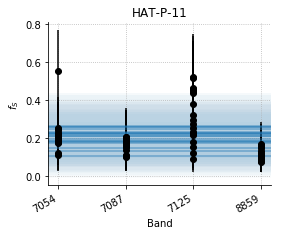

In [42]:
import json
h11_results = json.load(open('bandbyband_h11_results.json', 'r'))
figure, axis = plt.subplots(figsize=(4, 3))
for time in h11_results:
    f_S = np.mean([h11_results[time][band]['f_S'] for band in h11_results[time]])
    f_S_err = np.sqrt(np.sum(np.array([np.mean([h11_results[time][band]['f_S_lower'], 
                                                h11_results[time][band]['f_S_upper']]) 
                                       for band in h11_results[time]])**2)/4)
#     table_results.append({'Target': star, '$f_S$': "${0:.2f} \pm {1:.2f}$".format(f_S, f_S_err)})
    axis.axhline(f_S, alpha=0.5)
    axis.axhspan(f_S-f_S_err, f_S+f_S_err, alpha=0.02)
    for i, band in enumerate(h11_results[time]):
        m = h11_results[time][band]

        axis.errorbar(i, m['f_S'], yerr=np.array([[m['f_S_lower'], m['f_S_upper']]]), 
                      fmt='o', color='k')
        axis.set_title('HAT-P-11')

        for s in ['right', 'top']:
            axis.spines[s].set_visible(False)
        axis.grid(ls=':')
    axis.set_xticks(np.arange(4))
    axis.set_xticklabels(sorted(h11_results[time].keys()))
    plt.setp(axis.get_xticklabels(), rotation=30, ha='right')
axis.set(xlabel='Band', ylabel='$f_S$')
figure.savefig('paper_plots/h11.pdf', bbox_inches='tight')

In [20]:
from json import dump
from astropy.table import Table

f_S_table = Table(rows=table_results)

f_S_table.write('f_S.tex', overwrite=True)

In [21]:
f_S_table

$f_S$,Target
str15,str13
$0.31 \pm 0.13$,EKDra
$0.18 \pm 0.05$,EQVir
$0.20 \pm 0.09$,EPIC211928486
$0.03 \pm 0.03$,EPIC211966629
$0.38 \pm 0.13$,GJ702B
$0.27 \pm 0.08$,HD113827
$0.25 \pm 0.21$,HD127506
$0.41 \pm 0.13$,HD134319
$0.23 \pm 0.08$,HD151288
